In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
data = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Customer-Churn-Records.csv')

In [19]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [21]:
# Data Cleaning and Preprocessing
# Drop irrelevant columns like RowNumber, CustomerId, and Surname

data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [26]:
# Label encoding for Gender and Geography
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Card Type'] = label_encoder.fit_transform(data['Card Type'])


In [27]:
# Checking for missing values
print(data.isnull().sum())

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


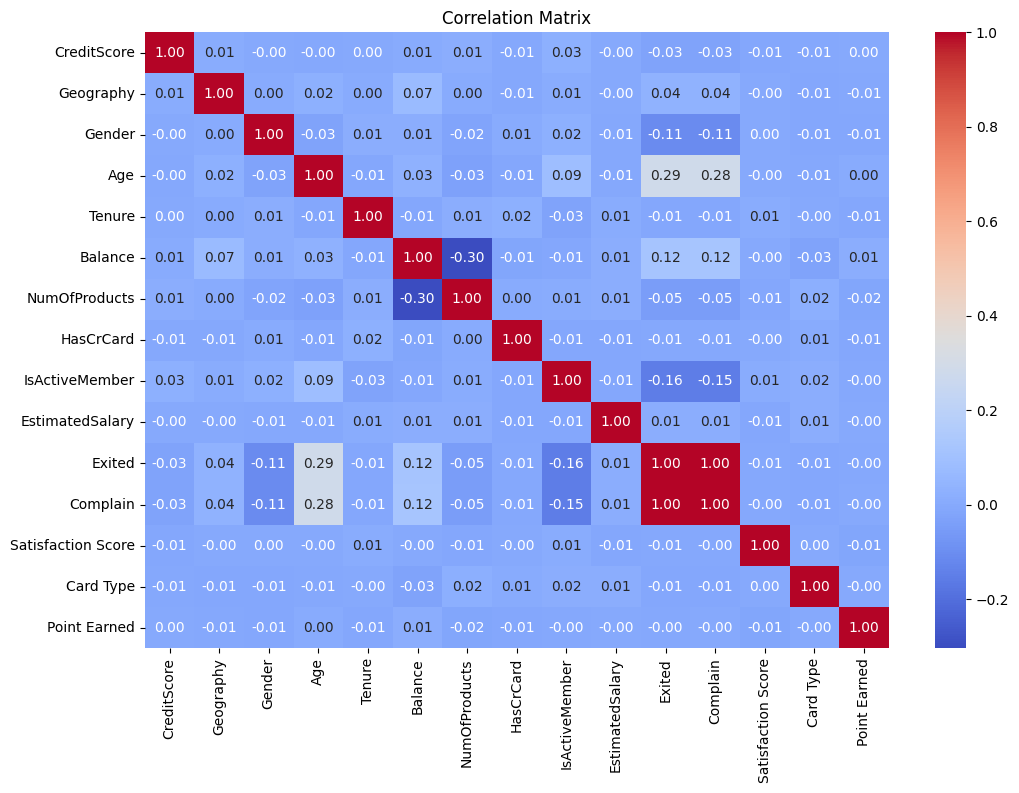

In [28]:
# 2. Exploratory Data Analysis (EDA)
# 2.1 Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

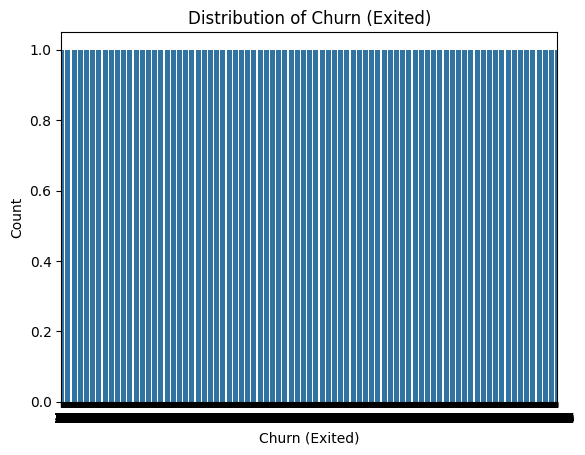

In [30]:
# 2.2 Distribution of the Target Variable (Exited)
sns.countplot(data['Exited'])
plt.title('Distribution of Churn (Exited)')
plt.xlabel('Churn (Exited)')
plt.ylabel('Count')
plt.show()

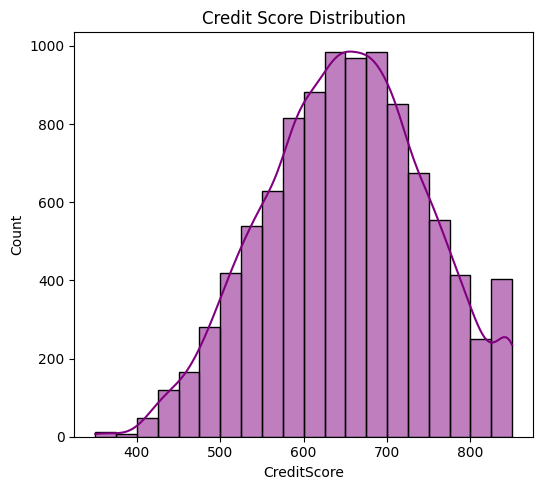

In [46]:
# 2.3 Distribution of CreditScore, Age, and EstimatedSalary
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['CreditScore'], bins=20, color='purple', kde=True)
plt.title('Credit Score Distribution')
plt.tight_layout()
plt.show()

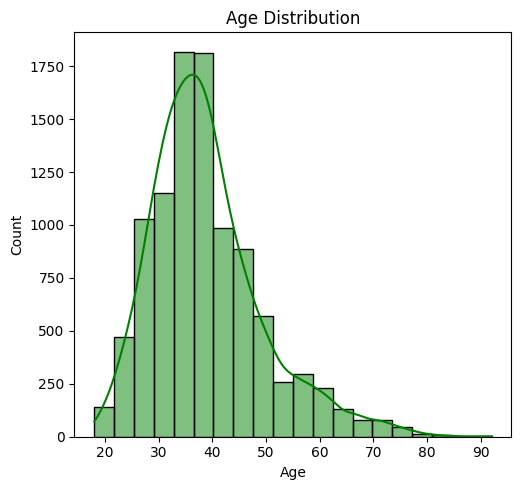

In [47]:
# Age Distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
sns.histplot(data['Age'], bins=20, color='green', kde=True)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

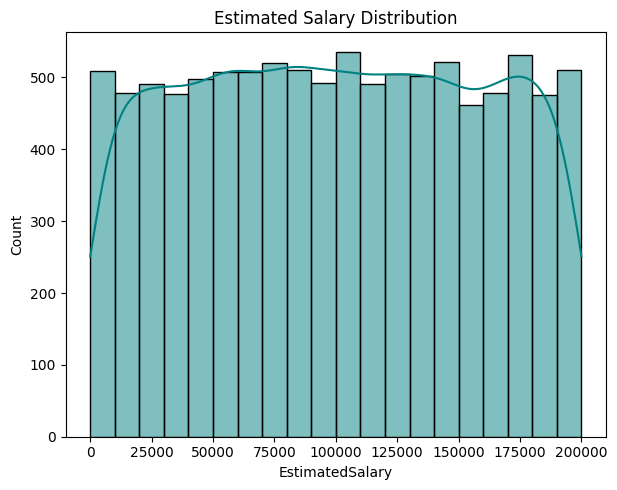

In [49]:
# EstimatedSalary Distribution
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
sns.histplot(data['EstimatedSalary'], bins=20, color='teal', kde=True)
plt.title('Estimated Salary Distribution')
plt.tight_layout()
plt.show()

In [51]:
X = data.drop(columns=['Exited'])  # Features
y = data['Exited'] #Target

In [52]:
# Spliting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# 5. Model Selection and Training

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [57]:
# Random Forest Classifier (for comparison)
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# 6. Model Evaluation

# Logistic Regression Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

In [59]:
# Random Forest Predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

In [62]:
# Accuracy of Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%")

Logistic Regression Accuracy: 99.90%


In [63]:
# Accuracy of Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 99.90%


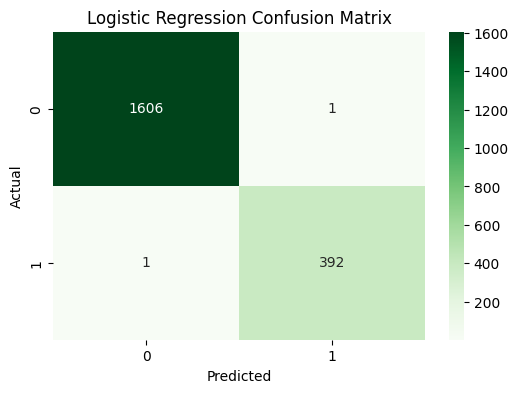

In [67]:
# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap="Greens")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
# ROC AUC Score for Logistic Regression
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)
print(f"Logistic Regression ROC AUC Score: {roc_auc_log_reg:.2f}")

Logistic Regression ROC AUC Score: 1.00


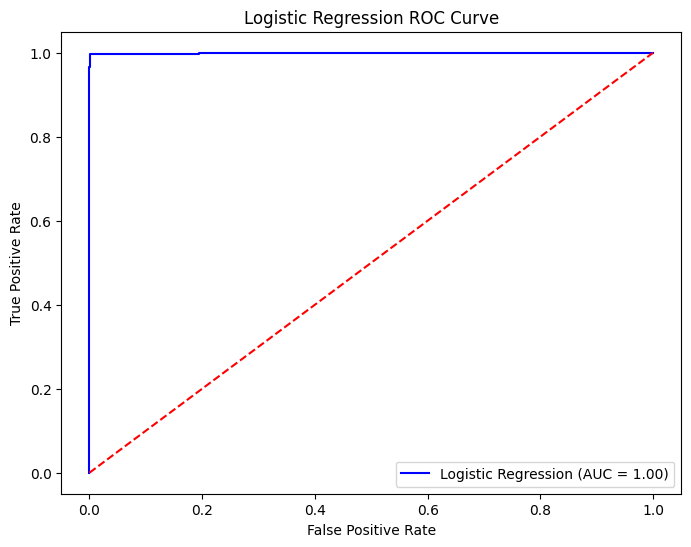

In [71]:
# ROC Curve for Logistic Regression
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_proba_log_reg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

In [75]:
# 7. Hyperparameter Tuning for Logistic Regression (using GridSearchCV)

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear']  # Solvers available for logistic regression
}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [76]:
# Best parameters from GridSearchCV
print(f"Best Parameters for Logistic Regression: {grid_search.best_params_}")


Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}


In [77]:
# Predict using the best model
best_log_reg = grid_search.best_estimator_
y_pred_best_log_reg = best_log_reg.predict(X_test)
y_pred_proba_best_log_reg = best_log_reg.predict_proba(X_test)[:, 1]

In [78]:
# Evaluate best logistic regression model
accuracy_best_log_reg = accuracy_score(y_test, y_pred_best_log_reg)
print(f"Best Logistic Regression Accuracy: {accuracy_best_log_reg * 100:.2f}%")


Best Logistic Regression Accuracy: 99.90%


In [79]:
roc_auc_best_log_reg = roc_auc_score(y_test, y_pred_proba_best_log_reg)
print(f"Best Logistic Regression ROC AUC Score: {roc_auc_best_log_reg:.2f}")

Best Logistic Regression ROC AUC Score: 1.00


In [84]:
# 8. Final Predictions
# Predicting whether a customer will churn for a single customer example
#The example customer array is missing one value. Add a value to match the 14 features expected.
example_customer = np.array([[0, 45, 5, 120000, 2, 1, 60000, 1, 1, 3, 0, 0.25, 5, 1]])  # Example input
example_customer_scaled = scaler.transform(example_customer)  # Remember to scale it
predicted_churn = best_log_reg.predict(example_customer_scaled)

In [85]:
print(f"Predicted Churn: {'Yes' if predicted_churn == 1 else 'No'}")

Predicted Churn: Yes
